#<b>Edge Detection Segmentation</b>

What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image.
To detect edges, we will use filters and convolutions. Choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).

One such weight matrix is the sobel operator. It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges. 

Sobel filter (horizontal) =

[1	2	1

0	0	0

-1	-2	-1]
 

Sobel filter (vertical) =

[-1	0	1

-2	0	2

-1	0	1]

In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [2]:
%cd ./drive/My Drive/Colab Notebooks/Image Segmentation

/content/drive/My Drive/Colab Notebooks/Image Segmentation


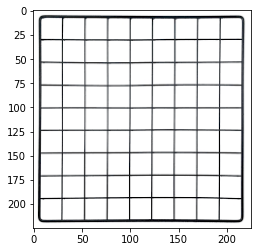

In [3]:
image = plt.imread('index.png')
plt.imshow(image)

In [6]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
print()
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [0]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

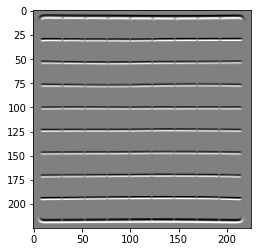

In [8]:
plt.imshow(out_h, cmap='gray')

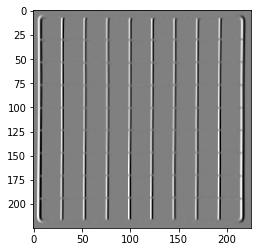

In [9]:
plt.imshow(out_v, cmap='gray')

Here, we are able to identify the horizontal as well as the vertical edges. There is one more type of filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

[1	1	1

1	-8	1

1	1	1]

In [14]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


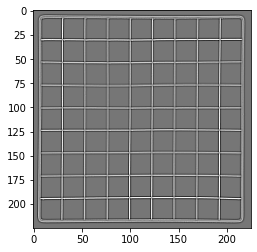

In [15]:

out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')